In [17]:
import gc
gc.collect()

22

In [2]:
# Import comet_ml at the top of your file
# from comet_ml import Experiment

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import swifter


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scipy.sparse import coo_matrix, hstack
import seaborn as sns

port_stem = PorterStemmer()

In [3]:
#Read dataset
data = pd.read_csv("./all_data.csv").drop("Unnamed: 0", axis=1)

In [4]:
#Displaying the new dataset which we will be working with
df2 = data.loc[:,['title','text','type']]

# Any null values
df2.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [5]:
# # For dataset (NAMED data) ONLY
# df2 = df2.fillna('')
# df2.isnull().sum()

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english') 

def clean_text(doc):
    
    # remove punctuation
    doc = re.sub(r"[\s+\.\!\/_,|%^*#(+\"\')?<>:-]", " ", doc)
    
    # remove @
    pattern2 = r"@\S+"
    doc = re.sub(pattern2, "", doc)

    # tokenization
    tokens = nltk.word_tokenize(doc)
    
    # lower words
    # tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    # tokens = [w for w in tokens if not w in stop_words] 
    
    # Return a cleaned string or list
    return" ".join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     /home/users/s/sarthak_7034/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/s/sarthak_7034/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

#Applying lamdba function to clean text
df2['text'] = df2.swifter.apply(lambda row: clean_text(row['text']), axis=1)
#Clean title
df2['title'] = df2.swifter.apply(lambda row: clean_text(row['title']), axis=1)

df2

Pandas Apply:   0%|          | 0/20015 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20015 [00:00<?, ?it/s]

,title,text,type
0,At Donald Trump U 2019 s Properties a Showcase...,They stood in line at Trump Tower sometimes up...,real
1,Trump Foundation Tells New York It Has Stopped...,Donald J Trump U 2019 s foundation informed At...,real
2,Donald Trump Prepares for White House Move but...,President elect Donald J Trump won the White H...,real
3,Luring Chinese Investors With Trump U 2019 s N...,An investment pitch for a new Texas hotel is t...,real
4,Melania and Barron Trump Won U 2019 t Immediat...,President elect Donald J Trump U 2019 s wife M...,real
...,...,...,...
20010,Alabama Lawmaker Same Sex Couples Don U 2019 t...,Most conservatives who oppose marriage equalit...,real
20011,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,real
20012,State Department says it can t find emails fro...,The State Department told the Republican Natio...,real
20013,In Ethiopia Obama seeks progress on peace secu...,ADDIS ABABA Ethiopia U 2014 President Obama co...,real


In [8]:
#Train - test
X_train, X_test, y_train, y_test = train_test_split(
    df2[['text', 'title']], df2['type'], test_size=0.2, random_state=42)

In [9]:
# corpus = pd.concat([df2['title'], df2['text']])

corpus = pd.concat([X_train['title'], X_train['text']])

MAX_FEATURES = 50000

#Assign the type of vectorizer
VECTORIZER = 'tfidf'

def fit_tfidf(documents):
    tfidf = TfidfVectorizer(input = 'content', stop_words = 'english',  
                            max_features = MAX_FEATURES )
    tfidf.fit(documents.values)
    return tfidf


# def fit_bow(documents):
#     bow = CountVectorizer(input='content', stop_words='english',
#                           max_features = MAX_FEATURES)
#     bow.fit(documents.values)
#     return bow

if VECTORIZER == 'tfidf':
    vectorizer = fit_tfidf(corpus)

# elif VECTORIZER == 'bow':
#     vectorizer = fit_bow(corpus)

# headline_matrix = vectorizer.transform(df2['title'])
# body_matrix = vectorizer.transform(df2['text'])

headline_matrix = vectorizer.transform(X_train['title'])
body_matrix = vectorizer.transform(X_train['text'])


In [10]:
corpus = pd.concat([X_test['title'], X_test['text']])


#Assign the type of vectorizer
VECTORIZER = 'tfidf'

def fit_tfidf(documents):
    tfidf = TfidfVectorizer(input = 'content', stop_words = 'english',  
                            max_features = MAX_FEATURES )
    tfidf.fit(documents.values)
    return tfidf


headline_matrix_test = vectorizer.transform(X_test['title'])
body_matrix_test = vectorizer.transform(X_test['text'])

In [11]:
X_train = hstack([headline_matrix, body_matrix]).toarray()
X_test = hstack([headline_matrix_test, body_matrix_test]).toarray()

In [12]:

# X = hstack([headline_matrix, body_matrix]).toarray()
# y = df2['type']
# y = df2['Label']
#Train - test
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2, random_state=42)

# #Train - valid
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X_train, y_train, test_size=0.25, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16012, 100000)
(4003, 100000)
(16012,)
(4003,)


In [13]:
classifier = svm.SVC(kernel='linear', random_state= 0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [14]:
predict = classifier.predict(X_test)

In [15]:

print("The classification report is:")
print(classification_report(y_test, predict))

print("The accuracy for testing data is", np.mean(predict == y_test) )
print("The accuracy for training data is", np.mean(classifier.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

        fake       0.98      0.98      0.98      2419
        real       0.98      0.96      0.97      1584

    accuracy                           0.98      4003
   macro avg       0.98      0.97      0.97      4003
weighted avg       0.98      0.98      0.98      4003

The accuracy for testing data is 0.9757681738695978
The accuracy for training data is 0.9990632025980515


<AxesSubplot:>

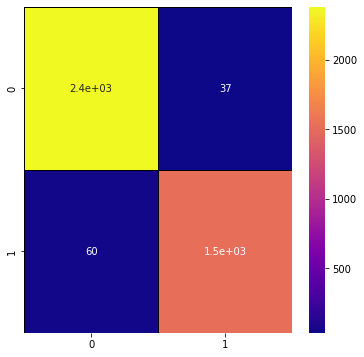

In [16]:
# Confusion Matrix of SVM
cm = confusion_matrix(y_test, predict)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True,cmap ='plasma', linecolor ='black', linewidths = 1)